In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
url = 'E:/mousita/ML/datasets/train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic_data = titanic.drop(['Name','Ticket','Cabin','Embarked','SibSp','Parch','Fare'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [6]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data)

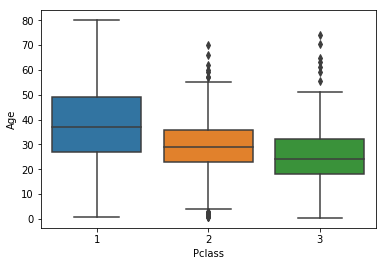

In [7]:
plt.show()

In [8]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [ ]:
# use either this or get_dummies
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
titanic_data['Sex']=le.fit_transform(titanic_data['Sex'])

In [10]:
gender = pd.get_dummies(titanic_data['Sex'])

In [11]:
titanic_data.drop(['Sex'],axis=1,inplace=True)

In [12]:
titanic_dmy = pd.concat([titanic_data,gender],axis=1)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,female,male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1


In [13]:
X = titanic_dmy.iloc[:,[0,2,3,4,5]].values
y = titanic_dmy.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,random_state=40)

In [14]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [25]:
y_p=LogReg.predict([[1,3,22.0,0,1]])

In [26]:
y_p

array([0], dtype=int64)

In [15]:
accuracy_score(y_test,y_pred)

0.8100558659217877

In [16]:
c=confusion_matrix(y_test,y_pred)

In [17]:
c

array([[88, 15],
       [19, 57]], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.84       103
          1       0.79      0.75      0.77        76

avg / total       0.81      0.81      0.81       179



In [19]:
cm=pd.DataFrame(c)

In [20]:
sb.heatmap(cm,annot=True)

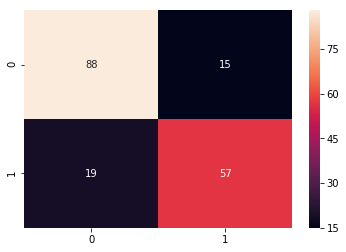

In [21]:
plt.show()

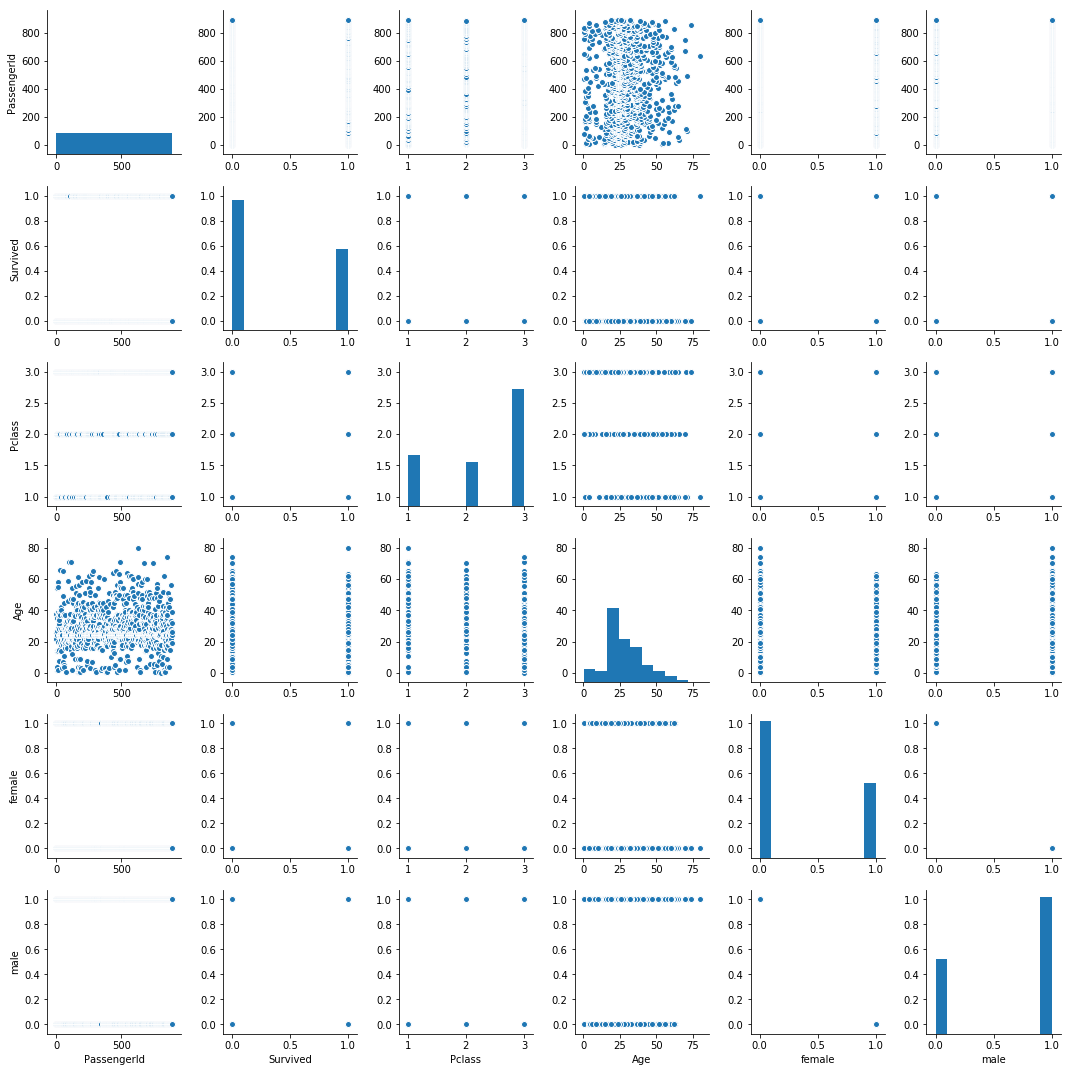

In [22]:
sb.pairplot(titanic_dmy)
plt.show()